## Here we are presented with some fake data for work with a fictitious e-commerce company that sells clothes online in conjuntion to maintaining a brick and mortar store for trying the clothes on live. They can then go home and 1) order the clothes on a mobile app or 2) order on the website.

## The company is trying to decide whether to focus on the mobile app or the website for clothes sales.


## Note: This is a Machine Learning Exercise Developed by Pierian Data, I wrote the code but they provided the data

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Ecommerce Customers')

In [59]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


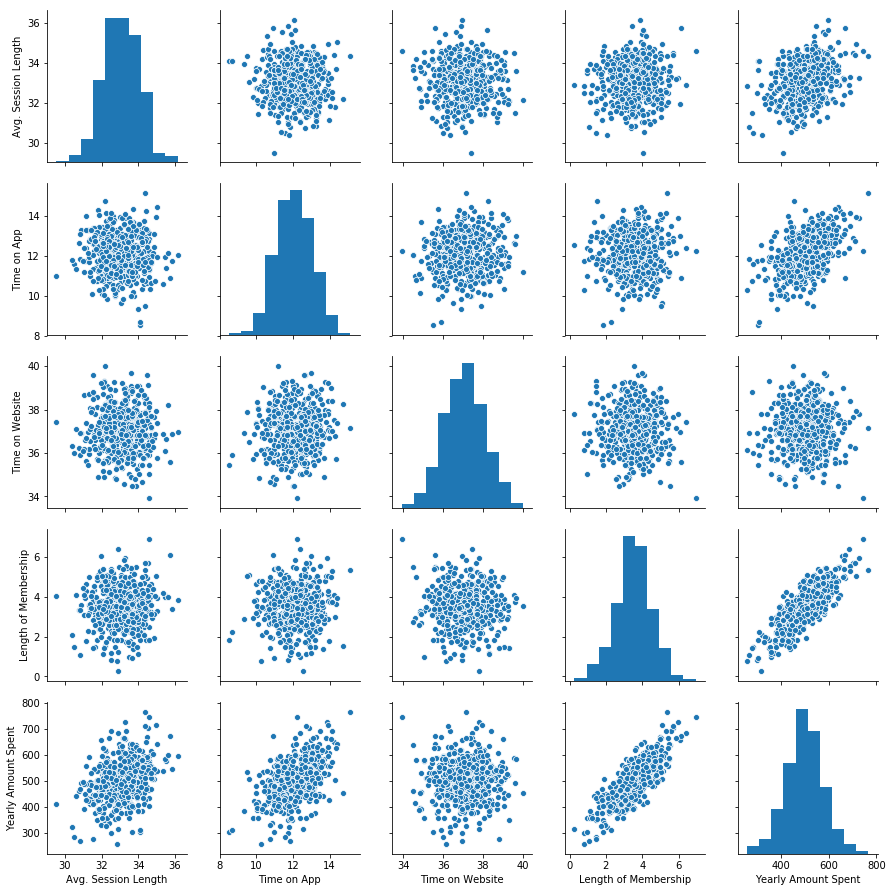

In [6]:
sns.pairplot(df)

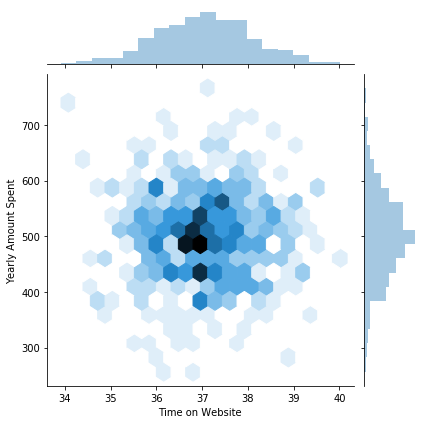

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='hex')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/legend.py:445: UserWarning: The handle <matplotlib.patches.Patch object at 0x120dd9f10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


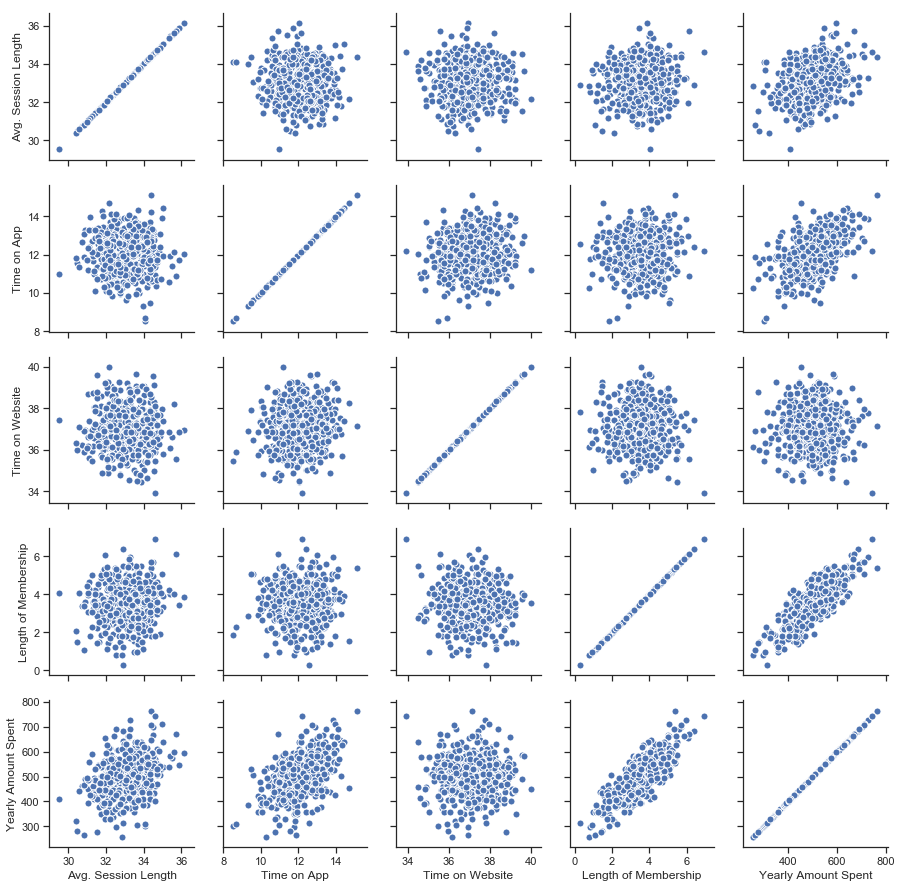

In [8]:
#Different way to do a pairplot
sns.set(style="ticks")
g = sns.PairGrid(df, palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

## Length of membership seems to impact yearly amount sent markedly

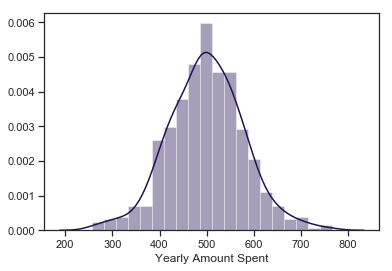

In [13]:
sns.distplot(df['Yearly Amount Spent'])

In [14]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

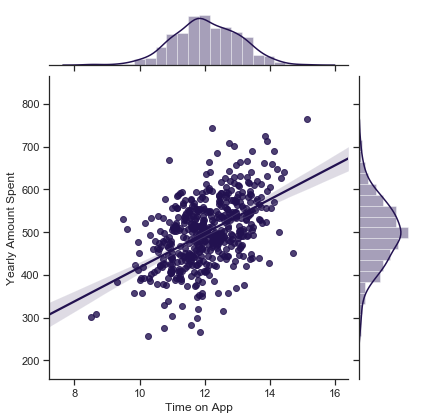

In [11]:
import seaborn as sns; sns.set(style="ticks", palette = 'magma')
g = sns.JointGrid(x = 'Time on App', y = 'Yearly Amount Spent', data = df)
g = g.plot(sns.regplot, sns.distplot)

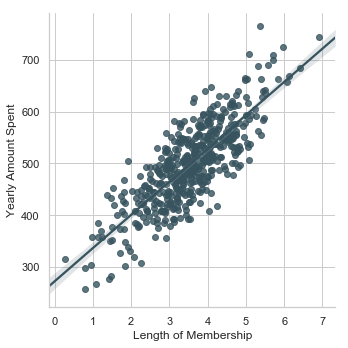

In [15]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df)

g

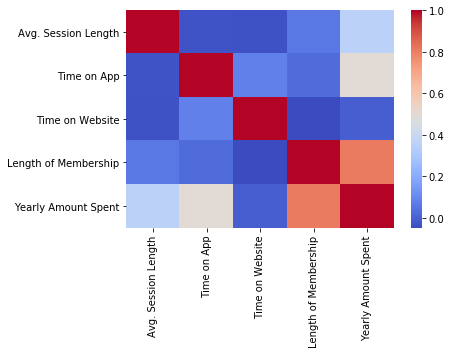

In [7]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [9]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

### Clearly all the data is telling us that  Avg Session Length, Time on App and Time on Website Are key inputs to our model

In [36]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [37]:
y = df['Yearly Amount Spent']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()

In [42]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
_# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [45]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

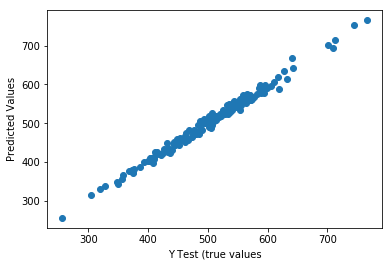

In [46]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (true values')
plt.ylabel('Predicted Values')

In [47]:
from sklearn.metrics import explained_variance_score

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343086
MSE: 79.81305165097483
RMSE: 8.933815066978655


In [54]:
#R^2 value
metrics.explained_variance_score(y_test, predictions) #The experimental data and the simulated data are closely correlated

0.9890771231889606

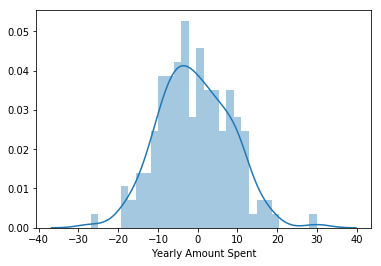

In [58]:
sns.distplot((y_test-predictions),bins=30);

In [56]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## How do you interpret these coefficients, What possible use can they serve?
### -Think about these coefficients as being numbers that, all other factors being held constant, How would the slope of the line increase if a 1 unit increase affect the results?. For example:
#### if , Holding all other inputs fixed, a 1 unit increase in the Time on the app would bring in an extra 35.59 dollars to the company
#### Holding all else fixed and just changing the length of membership 1 Unit would net the company an extra 61.28 dollars


# Conclusion

## What if you had a client that was wondering if using an app vs. using a websisite would be more profitable? This is a no-brainer: Focus on the app. However, I would say that they should focus on the the app TO KEEP THE CUSTOMERS THAT THEY HAVE. A rewards program for staying with the company would be great. Furthermore, the app might be the very means that the customers can get drawn in- and KEPT.